## Importing Data

In [42]:

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score


import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder

In [33]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
iris = pd.read_csv("../input/iris/Iris.csv") # the iris dataset is now a Pandas DataFrame
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
iris.shape

(150, 6)

In [14]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

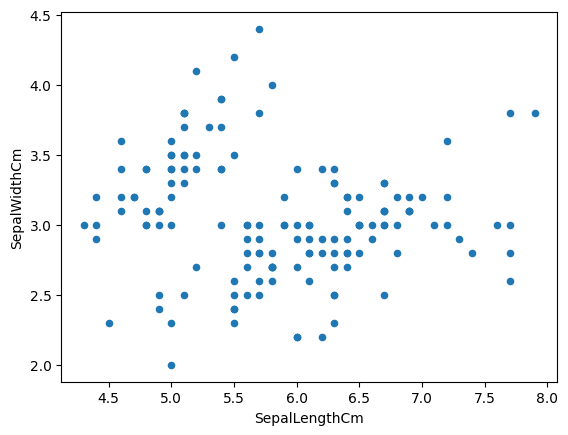

In [20]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

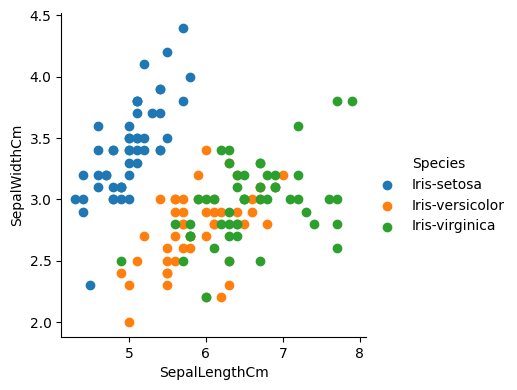

In [30]:
sns.FacetGrid(iris, hue="Species",height = 4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

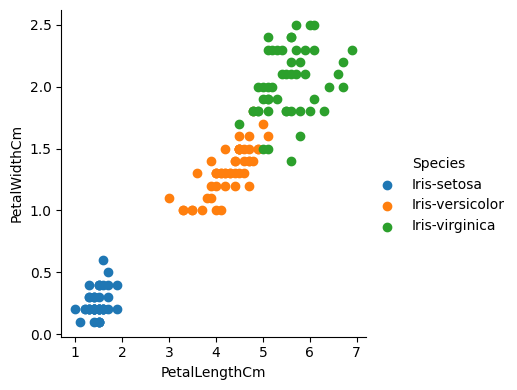

In [44]:
sns.FacetGrid(iris, hue="Species",height = 4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

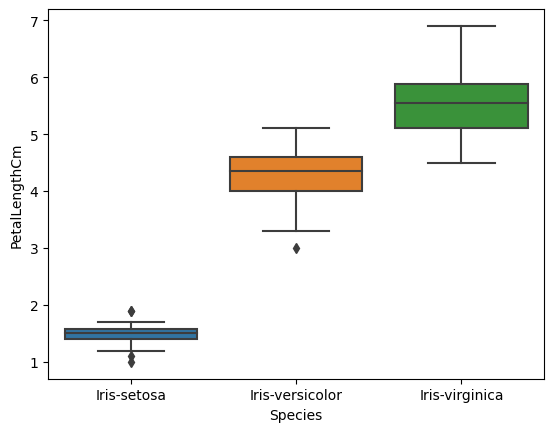

In [31]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

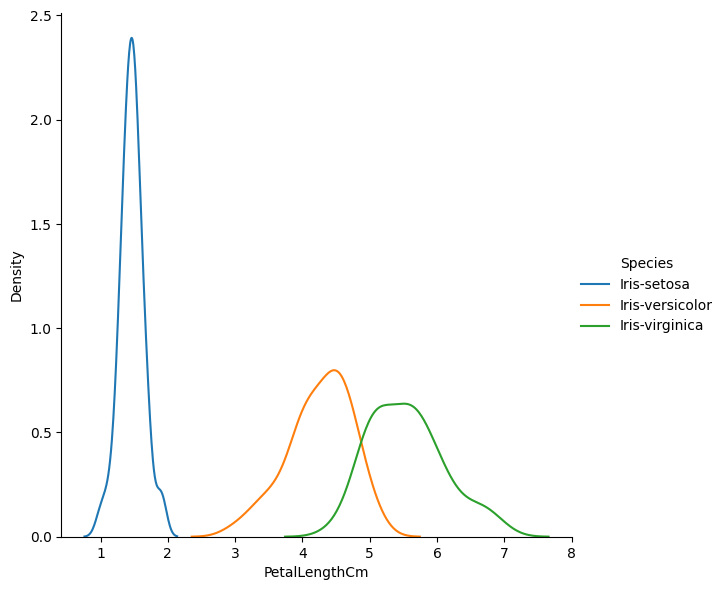

In [34]:
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

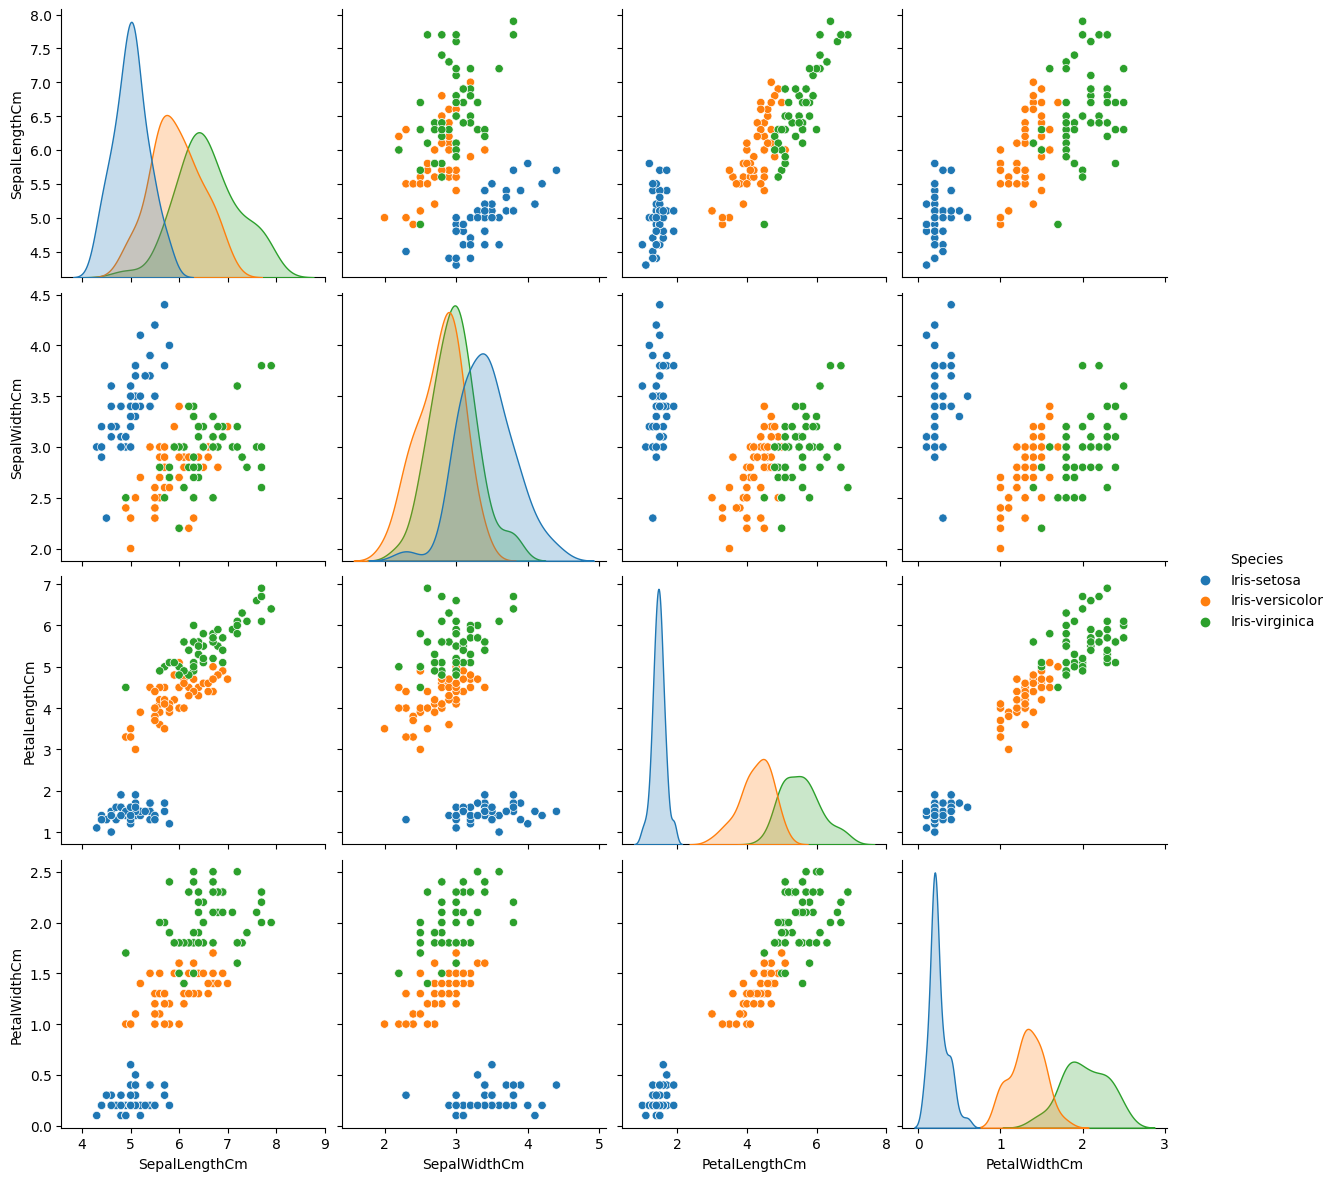

In [35]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

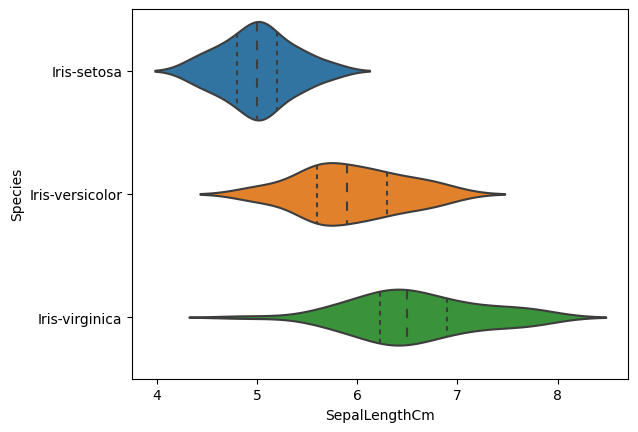

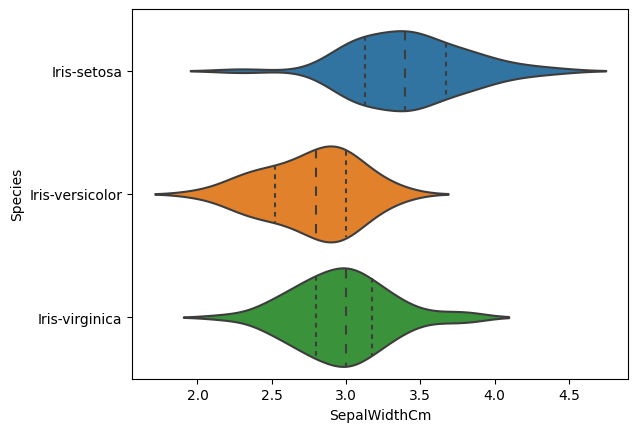

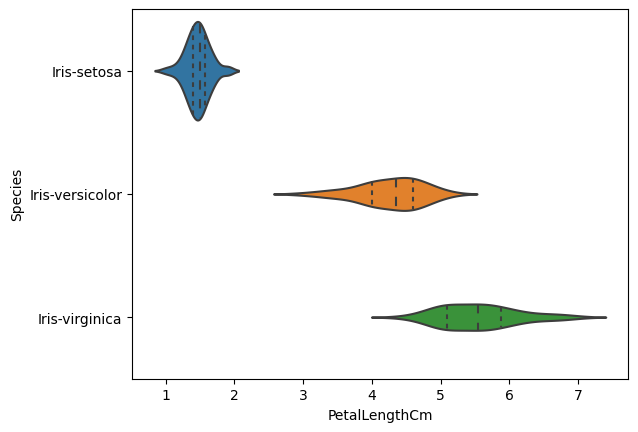

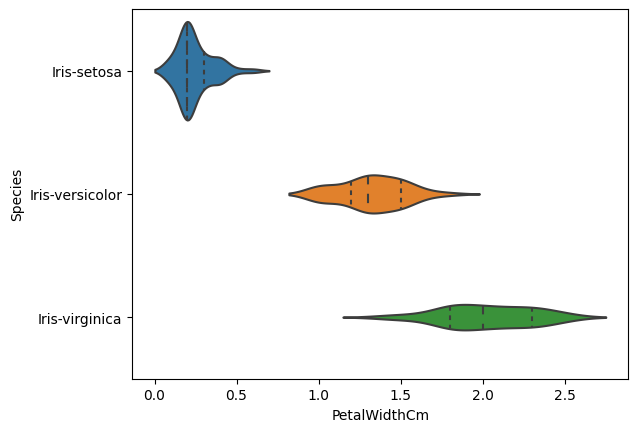

In [37]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

## Using Machine Learning

In [47]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']

In [54]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [55]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

### Logisitic Regression

In [75]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.9777777777777777


Accuracy: 0.9777777777777777


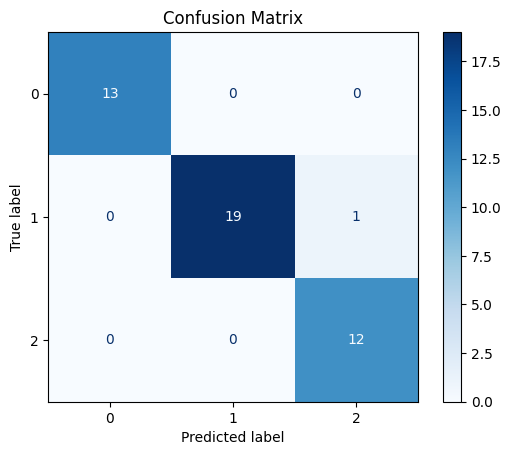

In [86]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# Calculate accuracy
accuracy = accuracy_score(y_test, lr_predict)
print('Accuracy:', accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lr_predict)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### SVM

Accuracy: 1.0


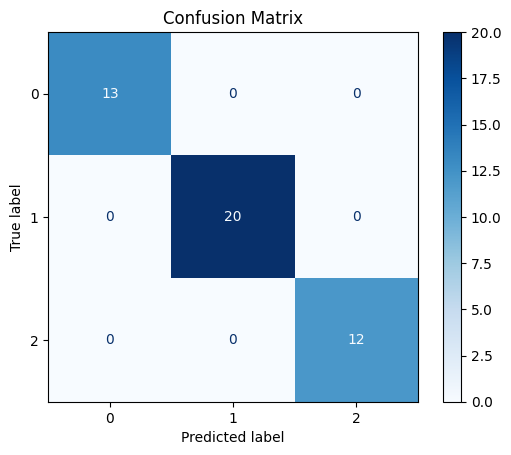

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

# Predict using the model
svc_predict = svm_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svc_predict)
print('Accuracy:', accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svc_predict)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Naive Bayes Classification

In [59]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)

print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.9555555555555556


### Decision Tree

Decision Tree Accuracy: 0.9333333333333333


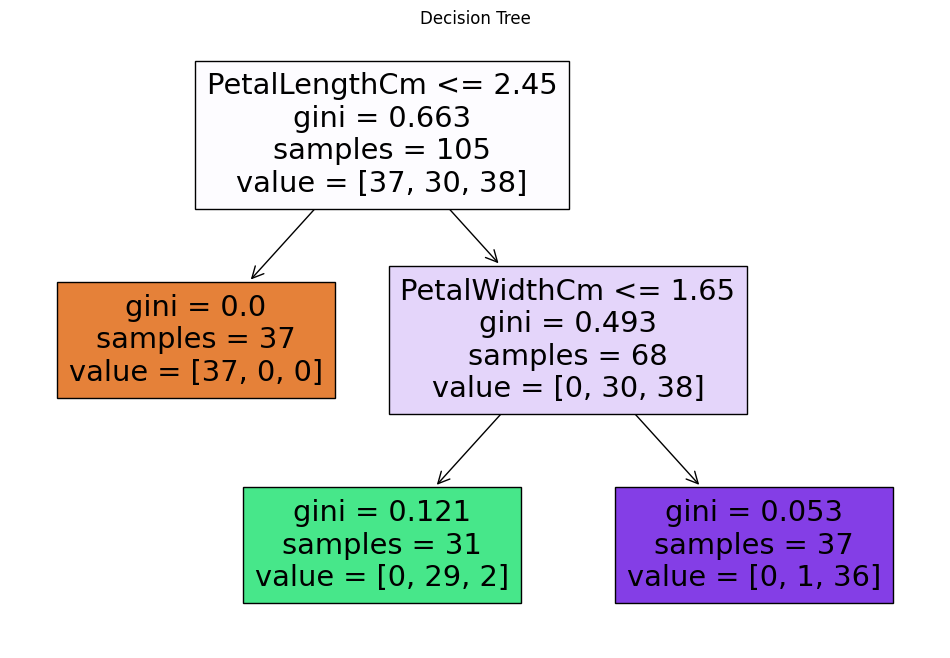

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are defined

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train, y_train)

# Predict using the model
dt_predict = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_predict)
print('Decision Tree Accuracy:', accuracy)

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'])  # Replace feature names accordingly
plt.title('Decision Tree')
plt.show()


### Random Forest

In [89]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.9555555555555556


In [95]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifier
rfc_model = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rfc_model = grid_search.best_estimator_

# Predict using the best model
rfc_predict = best_rfc_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_predict)
print('Random Forest Accuracy:', accuracy)

# Print best parameters
print('Best Parameters:', best_params)

Random Forest Accuracy: 0.9555555555555556
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


### XGBoost

In [67]:
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train,y_train)
xg_model.score(x_test, y_test)

0.9777777777777777